See developer site:

https://dev.socrata.com/foundry/data.cityofnewyork.us/jtpv-nuuc

NYC Open Data site on this survey:

https://data.cityofnewyork.us/Education/2019-20-School-Quality-Guide-Elementary-Middle-Sch/jtpv-nuuc

In [1]:
#load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import nbformat
from sodapy import Socrata

<ipython-input-1-e6fa03ff78cc>:9: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-e6fa03ff78cc>:10: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# check versions
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'dash version: {dash.__version__}')
print(f'nbformat version: {nbformat.__version__}')

pandas version: 1.3.4
numpy version: 1.19.5
seaborn version: 0.11.1
dash version: 2.0.0
nbformat version: 5.1.3


In [3]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy



# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("jtpv-nuuc", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.shape

(1311, 146)

In [5]:
results_df.head()

dbn                     school_name school_type enrollment survey_pp_ri  \
0  01M015       P.S. 015 Roberto Clemente  Elementary        176         0.82   
1  01M019             P.S. 019 Asher Levy  Elementary        220         0.87   
2  01M020            P.S. 020 Anna Silver  Elementary        423         0.73   
3  01M034  P.S. 034 Franklin D. Roosevelt         K-8        279          0.6   
4  01M063       The STAR Academy - P.S.63  Elementary        203         0.72   

  survey_pp_ct survey_pp_se survey_pp_es survey_pp_sf survey_pp_tr  ...  \
0         0.91         0.84         0.92         0.97         0.94  ...   
1         0.91         0.94          0.9         0.96         0.91  ...   
2         0.88         0.83         0.92         0.96         0.96  ...   
3         0.67         0.66         0.79         0.92         0.88  ...   
4         0.87         0.83         0.94         0.97         0.94  ...   

  n_prof_2plus_watn3_mthlevel1 val_prof_2plus_watn3_mthlevel1  \
0                            3                        No Data   
1                            3                        No Data   
2                           25                            0.2   
3                      No Data                        No Data   
4                            2                        No Data   

  n_prof_pct_watn3_elalevel2 val_prof_pct_watn3_elalevel2  \
0                          6                      No Data   
1                          7                      No Data   
2                         28                        0.214   
3                    No Data                      No Data   
4                          6                      No Data   

  n_prof_pct_watn3_elalevel34 val_prof_pct_watn3_elalevel34  \
0                          12                       No Data   
1                          18                         0.778   
2                          22                         0.591   
3                     No Data                       No Data   
4                          14                       No Data   

  n_prof_pct_watn3_mthlevel2 val_prof_pct_watn3_mthlevel2  \
0                         10                      No Data   
1                          4                      No Data   
2                         21                        0.238   
3                    No Data                      No Data   
4                          8                      No Data   

  n_prof_pct_watn3_mthlevel34 val_prof_pct_watn3_mthlevel34  
0                          11                       No Data  
1                          21                         0.667  
2                          25                          0.92  
3                     No Data                       No Data  
4                          10                       No Data  

[5 rows x 146 columns]

In [6]:
results_df.describe()

dbn school_name school_type enrollment survey_pp_ri survey_pp_ct  \
count     1311        1311        1311       1311         1311         1311   
unique    1311        1308           3        752           56           53   
top     01M015    P.S. 360  Elementary        247      No Data      No Data   
freq         1           2         693          7          164          163   

       survey_pp_se survey_pp_es survey_pp_sf survey_pp_tr  ...  \
count          1311         1311         1311         1311  ...   
unique           59           58           28           41  ...   
top         No Data         0.95         0.96         0.92  ...   
freq            164           68          197           90  ...   

       n_prof_2plus_watn3_mthlevel1 val_prof_2plus_watn3_mthlevel1  \
count                          1311                           1311   
unique                           62                            138   
top                         No Data                        No Data   
freq                            687                           1013   

       n_prof_pct_watn3_elalevel2 val_prof_pct_watn3_elalevel2  \
count                        1311                         1311   
unique                         78                          167   
top                       No Data                      No Data   
freq                          664                          853   

       n_prof_pct_watn3_elalevel34 val_prof_pct_watn3_elalevel34  \
count                         1311                          1311   
unique                         127                           286   
top                        No Data                       No Data   
freq                           659                           750   

       n_prof_pct_watn3_mthlevel2 val_prof_pct_watn3_mthlevel2  \
count                        1311                         1311   
unique                         62                          179   
top                       No Data                      No Data   
freq                          664                          916   

       n_prof_pct_watn3_mthlevel34 val_prof_pct_watn3_mthlevel34  
count                         1311                          1311  
unique                         133                           305  
top                        No Data                       No Data  
freq                           658                           767  

[4 rows x 146 columns]

In [7]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Columns: 146 entries, dbn to val_prof_pct_watn3_mthlevel34
dtypes: object(146)
memory usage: 1.5+ MB


#### Helper functions

In [8]:
def catvardistribution(data,var,x,y,rot):
    print(data[var].value_counts(dropna=False))
    fig, ax = plt.subplots(figsize=(x,y)) # Set figure size
    sns.set(style="darkgrid")
    ax = sns.countplot(x=data[var], data=data, palette='Reds')
    plt.xticks(rotation=rot)
    plt.show()
    
def boxplot(data,var):
    print(data[var].describe())
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=data[var])
    plt.show()

### Feature engineering

Create district and borough variables

In [9]:
results_df['district'] = results_df['dbn'].str[0:2]
results_df['borough'] = results_df['dbn'].str[2:3]

In [10]:
# inspect new variables
print(f"Count of school districts: {len(np.unique(results_df['district']))}")
print(f"Count of school districts: {len(np.unique(results_df['borough']))}")

Count of school districts: 33
Count of school districts: 5


84    198
31     61
10     59
02     53
09     51
27     49
11     45
28     40
24     39
20     39
29     38
06     38
30     38
19     37
15     37
08     36
25     35
17     34
12     34
22     32
03     32
21     30
13     28
14     27
07     27
26     26
23     23
04     23
05     22
01     21
18     20
32     20
16     19
Name: district, dtype: int64


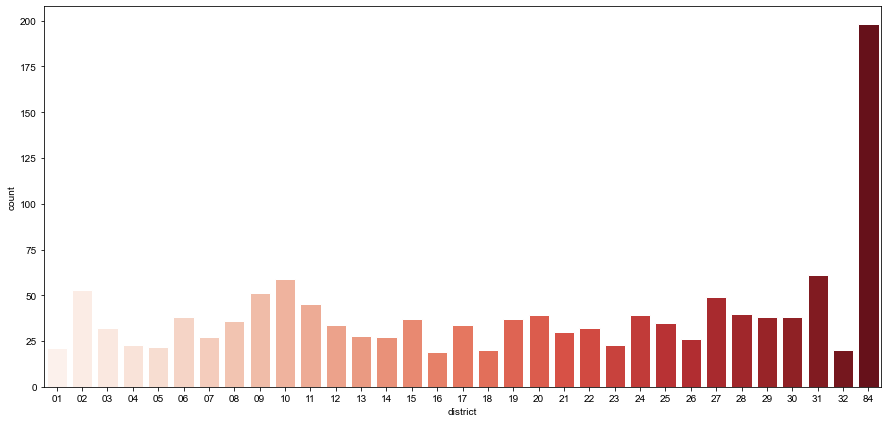

In [11]:
catvardistribution(data=results_df,var='district',x=15,y=7,rot=0)

K    421
X    309
Q    284
M    233
R     64
Name: borough, dtype: int64


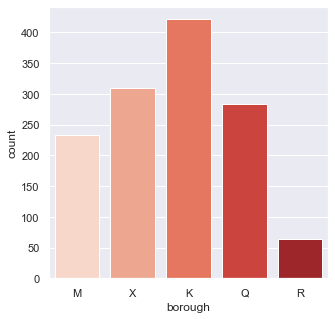

In [12]:
catvardistribution(data=results_df,var='borough',x=5,y=5,rot=0)

Group fields together - USE data dictionary as information source

In [13]:
# identification-related variables
ids = ['dbn','school_name','school_type','district','borough']

# surveys - percent positive
survey_proportions = ['survey_pp_ri', 'survey_pp_ct','survey_pp_se', 'survey_pp_es', 'survey_pp_sf', 'survey_pp_tr']

# survey response rate
survey_response_rate = ['rr_s', 'rr_t', 'rr_p']

# quality review - qualitative responses
quality_review = ['qr_1_1', 'qr_1_2', 'qr_2_2', 'qr_3_4', 'qr_4_2', 'qr_1_4', 'qr_1_3', 'qr_3_1', 'qr_4_1', 'qr_5_1']

# ratings on academic criteria
academic_ratings = ['rating_ela_grade_5_pct_rs', 'rating_mth_grade_5_pct_rs']

# student body and teacher demographic proportions
demographics = ['gender_female_pct', 'gender_male_pct','ethnicity_asian_pct','ethnicity_black_pct', 
                'ethnicity_hispanic_pct','ethnicity_amerindian_pct','ethnicity_white_pct', 
                'teacher_ethnicity_asian_pct','teacher_ethnicity_black_pct', 'teacher_ethnicity_hispanic',
                'teacher_ethnicity_amerindian', 'teacher_ethnicity_pacific','teacher_ethnicity_white_pct',
                'near_pct_asian','near_pct_black', 'near_pct_hispanic', 'near_pct_amerindian',
                'near_pct_pacific', 'near_pct_white','ethnicity_asian_pct_dist',
                'ethnicity_black_pct_dist', 'ethnicity_hispanic_pct_dist',
                'ethnicity_amerindian_pct_1', 'ethnicity_pacific_pct_dist','ethnicity_white_pct_dist']

# socio-economic proportions
socioeconomics = ['ell', 'iep', 'cap_sc_pct','eni_pct_k8', 'temp_housing_pct','hra_elig_pct'] 

# principal or teacher experience
experience = ['principal_experience', 'teach_3_more_exp']

# student and teacher attendance 
attendance = ['val_attendance_k8_all', 'val_chronic_absent_ems_all','teacher_attendance','n_chronic_absent_ems_all',
             'n_attendance_k8_all', 'n_chronic_absent_ems_allea','n_chronic_absent_ems_alleb', 
              'val_chronic_absent_ems_alleb','n_chronic_absent_ems_alleh', 'val_chronic_absent_ems_alleh',
              'n_chronic_absent_ems_allei','n_chronic_absent_ems_allem', 'val_chronic_absent_ems_allem',
             'n_chronic_absent_ems_allep', 'val_chronic_absent_ems_allep','n_chronic_absent_ems_allew',
             'val_chronic_absent_ems_allew', 'n_chronic_absent_ems_allgf','val_chronic_absent_ems_allgf', 
              'n_chronic_absent_ems_allgm','val_chronic_absent_ems_allgm']

# credits towards ninth grade (high school)
highschoolcredits = ['n_hs_9gr_credits_all', 'val_hs_9gr_credits_all',
                     'n_pct_accelerated_all', 'val_pct_accelerated_all']

# course pass rate across subjects
coursepassrate = ['n_pct_core_ela_all', 'val_pct_core_ela_all', 'n_pct_core_mth_all',
                  'val_pct_core_mth_all', 'n_pct_core_sci_all', 'val_pct_core_sci_all',
                  'n_pct_core_soc_all', 'val_pct_core_soc_all']

# interactions
interactions = ['n_interaction_k8_all','val_interaction_k8_all']

# eighth grade metrics
eighth_grade_metrics = ['n_pct_accel_lote_all',
       'val_pct_accel_lote_all', 'n_pct_accel_mth_all', 'n_pct_accel_p_all',
       'val_pct_accel_p_all','n_pct_accel_p_mth_all', 'n_pct_accel_p_sci_all',
       'val_pct_accel_p_sci_all', 'n_pct_accel_sci_all','val_pct_accel_sci_all', 'n_pct_accel_try_all', 
       'val_pct_accel_try_all','n_pct_accel_try_lote_all', 'val_pct_accel_try_lote_all',
       'n_pct_accel_try_mth_all','n_pct_accel_try_sci_all', 'val_pct_accel_try_sci_all']

# fifth grade metrics
fifth_grade_metrics = ['n_prof_2plus_watn5_elalevel1', 'val_prof_2plus_watn5_elalevel1',
                       'n_prof_2plus_watn5_mthlevel1', 'val_prof_2plus_watn5_mthlevel1',
                       'n_prof_pct_watn5_elalevel2', 'val_prof_pct_watn5_elalevel2',
                       'n_prof_pct_watn5_elalevel34', 'val_prof_pct_watn5_elalevel34',
                       'n_prof_pct_watn5_mthlevel2', 'val_prof_pct_watn5_mthlevel2',
                       'n_prof_pct_watn5_mthlevel34', 'val_prof_pct_watn5_mthlevel34']

# third grade metrics
third_grade_metrics = ['n_prof_pct_watn3_elalevel34', 'val_prof_pct_watn3_elalevel34',
                   'n_prof_pct_watn3_mthlevel2', 'val_prof_pct_watn3_mthlevel2',
                   'n_prof_pct_watn3_mthlevel34', 'val_prof_pct_watn3_mthlevel34']

# other indicators
other = ['enrollment','dates_of_review','median_distance','n_lre_all', 'val_lre_all','principal']

In [14]:
feature_dict = {'ids':ids, 'survey_proportions':survey_proportions, 
                'survey_response_rate':survey_response_rate,'quality_review':quality_review,
                'academic_ratings':academic_ratings, 'demographics':demographics,
               'socioeconomics':socioeconomics, 
                'experience': experience,
               'attendance': attendance, 'highschoolcredits':highschoolcredits,
                'coursepassrate': coursepassrate, 'interactions': interactions,
                'eighth_grade_metrics':eighth_grade_metrics, 'fifth_grade_metrics':fifth_grade_metrics,
               'third_grade_metrics':third_grade_metrics,
               'other':other}

In [15]:
def createdummies_fewvalues(variable, df):
    ''' Create dummies from variables with few values or low cardinality '''
    
    #Create dummy variables from the report status variable
    dummies = pd.get_dummies(df[variable])
    
    # include in dummies in dataset
    for col in dummies:
        df[f"{variable}_{col}"] = dummies[col]

In [16]:
def clean_names(df, column):
    ''' clean columns with strings and format mismatches'''
    df[column] = df[column].str.replace(r'N/A', '%') # remove spaces
    df[column] = df[column].str.rstrip('%')
    df[column] = df[column].replace(r'^\s*$', np.nan, regex=True)
    df[column] = df[column].astype('float')/100


In [17]:
# type cast variables to float
for var in feature_dict['survey_proportions']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')

for var in feature_dict['survey_response_rate']:
    clean_names(df=results_df, column=var)

for var in feature_dict['quality_review']:
    createdummies_fewvalues(variable=var, df=results_df) 

for var in feature_dict['academic_ratings']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')

for var in feature_dict['demographics']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['socioeconomics']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['experience']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['attendance']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['highschoolcredits']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['coursepassrate']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['interactions']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['eighth_grade_metrics']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    
for var in feature_dict['fifth_grade_metrics']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')

for var in feature_dict['third_grade_metrics']:
    results_df[var] = pd.to_numeric(results_df[var], errors='coerce')
    

In [18]:
results_df.head(10)

dbn                     school_name school_type enrollment  \
0  01M015       P.S. 015 Roberto Clemente  Elementary        176   
1  01M019             P.S. 019 Asher Levy  Elementary        220   
2  01M020            P.S. 020 Anna Silver  Elementary        423   
3  01M034  P.S. 034 Franklin D. Roosevelt         K-8        279   
4  01M063       The STAR Academy - P.S.63  Elementary        203   
5  01M064           P.S. 064 Robert Simon  Elementary        202   
6  01M110   P.S. 110 Florence Nightingale  Elementary        361   
7  01M134        P.S. 134 Henrietta Szold  Elementary        235   
8  01M140          P.S. 140 Nathan Straus         K-8        364   
9  01M142          P.S. 142 Amalia Castro  Elementary        278   

   survey_pp_ri  survey_pp_ct  survey_pp_se  survey_pp_es  survey_pp_sf  \
0          0.82          0.91          0.84          0.92          0.97   
1          0.87          0.91          0.94          0.90          0.96   
2          0.73          0.88          0.83          0.92          0.96   
3          0.60          0.67          0.66          0.79          0.92   
4          0.72          0.87          0.83          0.94          0.97   
5          0.90          0.97          0.90          0.97          0.98   
6          0.61          0.79          0.65          0.83          0.95   
7          0.63          0.76          0.69          0.84          0.95   
8          0.75          0.85          0.67          0.89          0.90   
9          0.84          0.85          0.87          0.89          0.99   

   survey_pp_tr  ... qr_3_1_Well Developed qr_4_1_Developing qr_4_1_No Data  \
0          0.94  ...                     0                 0              0   
1          0.91  ...                     1                 0              0   
2          0.96  ...                     0                 0              0   
3          0.88  ...                     0                 0              0   
4          0.94  ...                     0                 0              0   
5          0.97  ...                     0                 0              0   
6          0.87  ...                     0                 0              0   
7          0.90  ...                     0                 0              0   
8          0.87  ...                     0                 0              0   
9          0.91  ...                     0                 0              0   

  qr_4_1_Proficient qr_4_1_Well Developed qr_5_1_Developing qr_5_1_No Data  \
0                 0                     1                 0              0   
1                 0                     1                 0              0   
2                 1                     0                 1              0   
3                 1                     0                 1              0   
4                 0                     1                 0              0   
5                 0                     1                 0              0   
6                 1                     0                 1              0   
7                 1                     0                 0              0   
8                 1                     0                 0              0   
9                 0                     1                 0              0   

  qr_5_1_Proficient qr_5_1_Under Developed qr_5_1_Well Developed  
0                 1                      0                     0  
1                 0                      0                     1  
2                 0                      0                     0  
3                 0                      0                     0  
4                 1                      0                     0  
5                 1                      0                     0  
6                 0                      0                     0  
7                 1                      0                     0  
8                 0                      0                     1  
9                 1             

Inspect particular schools of interest

In [19]:
select_dbn = ['30Q398','30Q069','30Q212','30Q152','30Q222','30Q228','26Q159','28Q101']
select_df = results_df[results_df['dbn'].isin(select_dbn)]
select_df

dbn                            school_name school_type enrollment  \
853   26Q159                               P.S. 159  Elementary        616   
927   28Q101         P.S. 101 School in the Gardens  Elementary        662   
998   30Q069               P.S. 069 Jackson Heights  Elementary        909   
1016  30Q152  P.S. 152 Gwendoline N. Alleyne School  Elementary        869   
1020  30Q212                               P.S. 212  Elementary        721   

      survey_pp_ri  survey_pp_ct  survey_pp_se  survey_pp_es  survey_pp_sf  \
853           0.84          0.94          0.93          0.94          0.95   
927           0.81          0.84          0.88          0.87          0.97   
998           0.83          0.94          0.89          0.91          0.96   
1016          0.77          0.83          0.86          0.84          0.95   
1020          0.76          0.94          0.84          0.86          0.96   

      survey_pp_tr  ... qr_3_1_Well Developed qr_4_1_Developing  \
853           0.92  ...                     1                 0   
927           0.88  ...                     1                 0   
998           0.96  ...                     0                 0   
1016          0.90  ...                     0                 0   
1020          0.92  ...                     0                 0   

     qr_4_1_No Data qr_4_1_Proficient qr_4_1_Well Developed qr_5_1_Developing  \
853               0                 0                     1                 0   
927               0                 0                     1                 0   
998               0                 1                     0                 0   
1016              0                 0                     1                 0   
1020              0                 1                     0                 0   

     qr_5_1_No Data qr_5_1_Proficient qr_5_1_Under Developed  \
853               0                 0                      0   
927               0                 0                      0   
998               0                 1                      0   
1016              0                 1                      0   
1020              0                 1                      0   

     qr_5_1_Well Developed  
853                      1  
927                      1  
998                      0  
1016                     0  
1020                     0  

[5 rows x 190 columns]

In [20]:
district30elementary = results_df[(results_df['district']=='30') & (results_df['school_type']=='Elementary')]

In [21]:
district30elementary[['qr_1_1', 'qr_1_2', 'qr_2_2', 'qr_3_4', 'qr_4_2']]

qr_1_1          qr_1_2          qr_2_2          qr_3_4  \
994   Well Developed      Proficient  Well Developed  Well Developed   
996       Proficient      Proficient      Proficient  Well Developed   
997       Proficient      Proficient      Developing      Proficient   
998       Proficient      Proficient      Proficient  Well Developed   
999   Well Developed  Well Developed      Proficient  Well Developed   
1000      Developing      Developing      Developing  Well Developed   
1002      Proficient  Well Developed  Well Developed      Proficient   
1003      Proficient      Proficient      Proficient  Well Developed   
1004      Proficient      Developing      Proficient      Proficient   
1006      Proficient      Proficient      Proficient      Proficient   
1012      Proficient      Proficient      Developing      Proficient   
1013  Well Developed      Proficient      Proficient  Well Developed   
1014      Proficient      Proficient      Proficient      Proficient   
1015      Proficient      Proficient      Proficient  Well Developed   
1016      Proficient  Well Developed      Proficient      Proficient   
1017      Proficient      Proficient  Well Developed  Well Developed   
1018      Proficient      Proficient  Well Developed  Well Developed   
1020      Proficient      Proficient      Proficient      Proficient   
1023      Proficient  Well Developed  Well Developed  Well Developed   
1025      Proficient      Proficient      Proficient  Well Developed   
1029      Proficient      Proficient      Proficient  Well Developed   
1030      Proficient      Proficient      Proficient  Well Developed   

              qr_4_2  
994   Well Developed  
996   Well Developed  
997       Proficient  
998       Proficient  
999       Proficient  
1000      Proficient  
1002      Proficient  
1003      Proficient  
1004      Proficient  
1006      Developing  
1012      Proficient  
1013      Proficient  
1014      Proficient  
1015      Proficient  
1016  Well Developed  
1017  Well Developed  
1018      Proficient  
1020  Well Developed  
1023  Well Developed  
1025  Well Developed  
1029  Well Developed  
1030  Well Developed

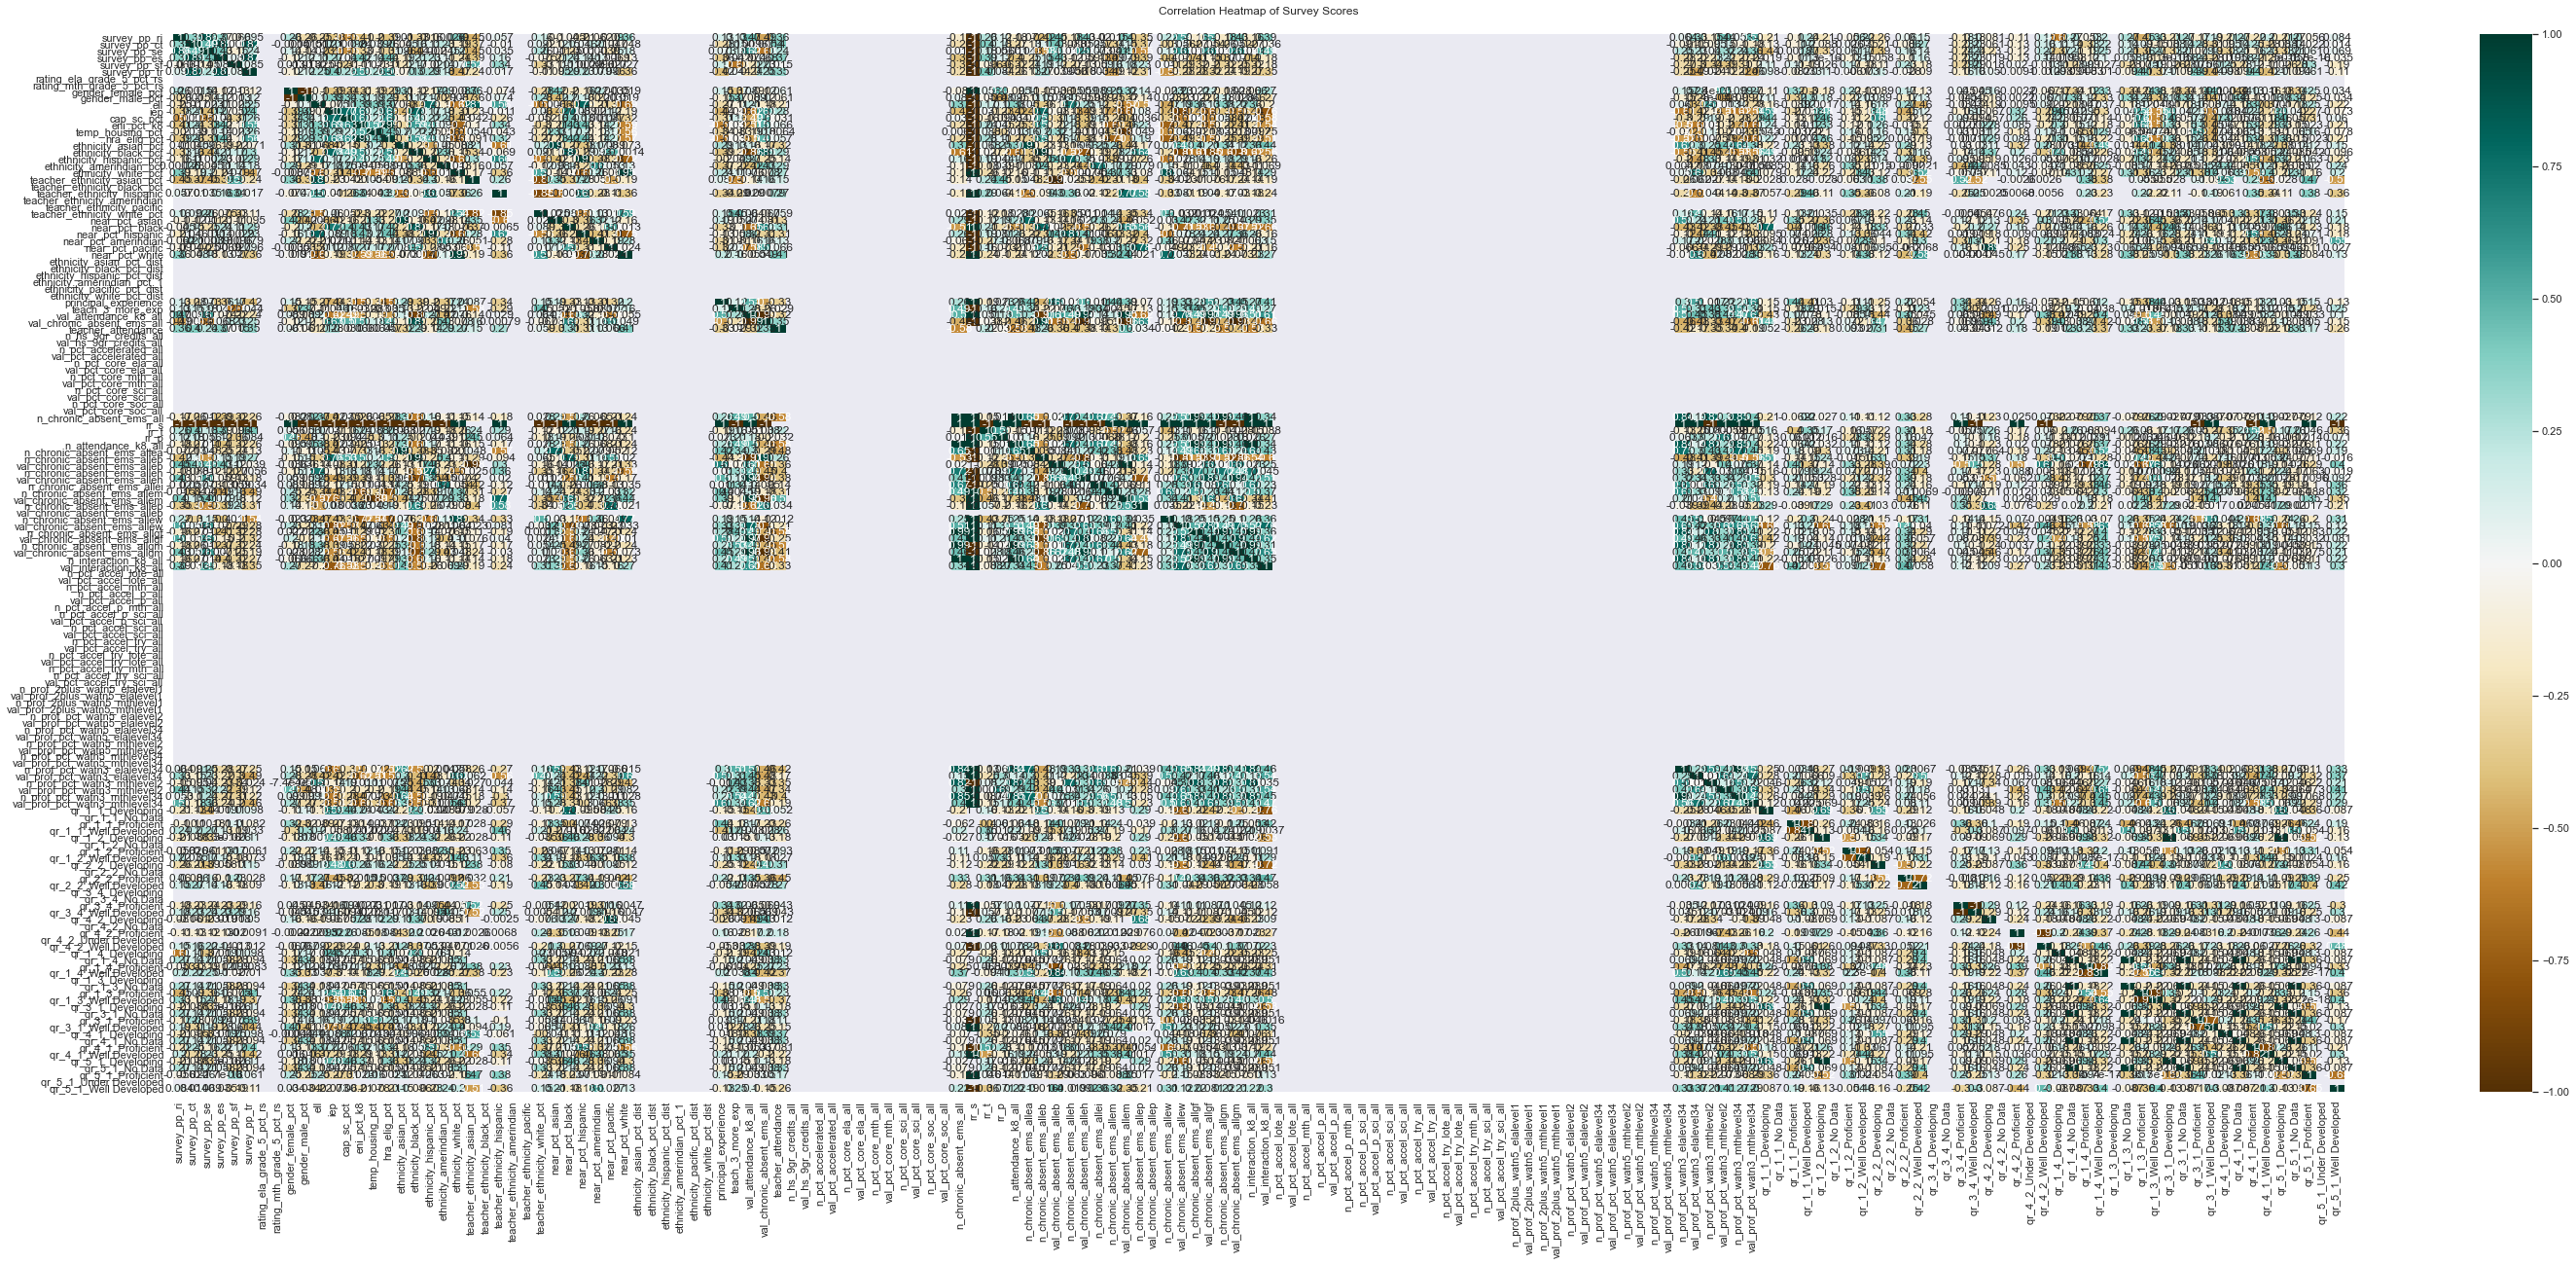

In [22]:
# correlation matrix for survey scores

def correlationMatrix(dataframe):
    corr = dataframe.iloc[:,4:].corr()
    # create a triangular matrix
#     mask = np.triu(np.ones_like(dataframe.iloc[:,4:].corr(), dtype=np.bool))
    
    # plot the heatmap
    plt.figure(figsize=(50,20))
    heatmap = sns.heatmap(corr,
                         xticklabels=corr.columns,
                         yticklabels=corr.columns,
#                          mask=mask,
                         vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap of Survey Scores', fontdict={'fontsize':12}, pad=20);

correlationMatrix(dataframe=district30elementary)

In [23]:
fig = px.scatter(district30elementary, x="qr_1_1", y="qr_1_2", #size='enrollment',
             color="borough", hover_name="school_name")
fig.update_traces(marker_size=10)

In [24]:
# results_df['principal experience']
results_df.columns[-20:]

Index(['qr_1_4_No Data', 'qr_1_4_Proficient', 'qr_1_4_Well Developed',
       'qr_1_3_Developing', 'qr_1_3_No Data', 'qr_1_3_Proficient',
       'qr_1_3_Well Developed', 'qr_3_1_Developing', 'qr_3_1_No Data',
       'qr_3_1_Proficient', 'qr_3_1_Well Developed', 'qr_4_1_Developing',
       'qr_4_1_No Data', 'qr_4_1_Proficient', 'qr_4_1_Well Developed',
       'qr_5_1_Developing', 'qr_5_1_No Data', 'qr_5_1_Proficient',
       'qr_5_1_Under Developed', 'qr_5_1_Well Developed'],
      dtype='object')

In [25]:
fig = px.scatter(district30elementary, x="val_prof_pct_watn3_mthlevel2", y="val_prof_pct_watn3_mthlevel34", #size='enrollment',
             color="school_name", hover_name="school_name")
fig.update_traces(marker_size=10)

In [26]:
app = dash.Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

fig = px.scatter(results_df, x="qr_1_1", y="qr_1_2", size='enrollment',
             color="borough", hover_name="school_name")

fig.update_traces(marker_size=10)

fig.show()


app.layout = html.Div(children=[
    dcc.Graph(
        id='interesting and challening verses effectiveness of instruction',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'